# Predicting Bike Rentals

bIn this DataQuest project we will work with the data compiled by Hadi Fanaee-T at the University of Porto. It is available for downloading from [the University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Here are the descriptions for the relevant columns:


|column|description|
|---|---|
|instant | A unique sequential ID number for each row|
|dteday | The date of the rentals|
|season | The season in which the rentals occurred|
|yr | The year the rentals occurred|
|mnth | The month the rentals occurred|
|hr | The hour the rentals occurred|
|holiday | Whether or not the day was a holiday|
|weekday | The day of the week (as a number, 0 to 7)|
|workingday | Whether or not the day was a working day|
|weathersit | The weather (as a categorical variable)|
|temp | The temperature, on a 0-1 scale|
|atemp | The adjusted temperature|
|hum | The humidity, on a 0-1 scale|
|windspeed | The wind speed, on a 0-1 scale|
|casual | The number of casual riders (people who hadn't previously signed up with the bike sharing program)|
|registered | The number of registered riders (people who had already signed up)|
|cnt | The total number of bike rentals (casual + registered)|


In this project, we'll try to predict the total number of bikes people rented in a given hour. We'll predict the `cnt` column using all of the other columns, except for `casual` and `registered`. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


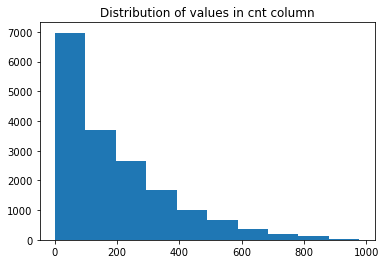

In [4]:
plt.hist(bike_rentals['cnt'])
plt.title('Distribution of values in cnt column')
plt.show()

The distribution of values in our target column in continuous, so we are predicting real values, not labels. This means we will need to use a regression algorithm, and not classification. The best recommended metric to measure the preformance of regressors ar mse or rmse. We will use rmse as it is easier to interpret.

<AxesSubplot:>

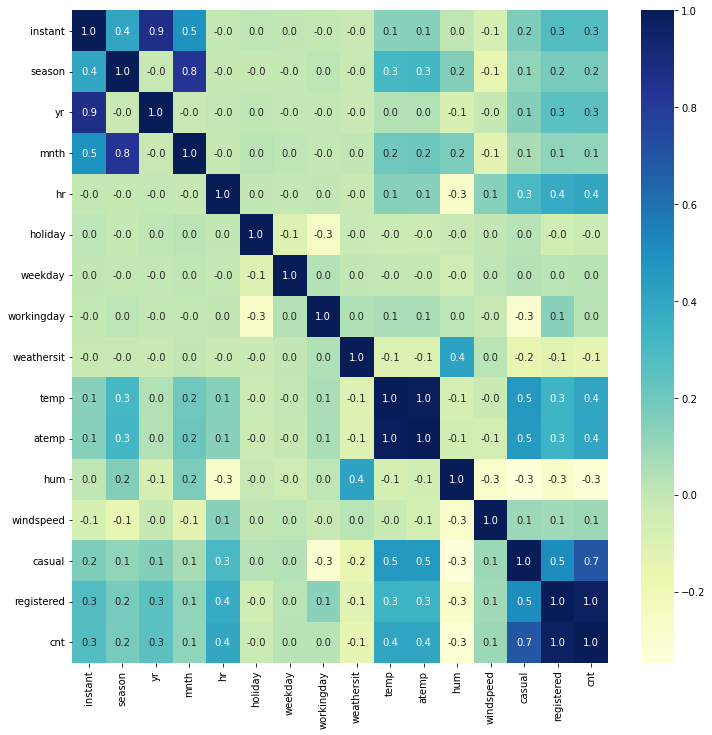

In [5]:
corrs = bike_rentals.corr()
fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(corrs, cmap="YlGnBu",annot=True, fmt= ".1f", ax=ax)

The `hr` column now shows time in 0-24 format. We will convert it into categories from morning(1), afternoon(2), evening(3) and night-time(4) to better represent the time perceived by humans (who rent bikes).

In [6]:
def assign_label(value):
    if value >= 6 and value < 12:
        return 1
    elif value >= 12 and value < 18:
        return 2
    elif value >= 18 and value < 24:
        return 3
    elif value >= 0 and value < 6:
        return 4

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)